## Logistic Regression
- Best Fit line represented by y=x1.w1+x2.w2+....+xn.wn
- Prediction carried out by plugging points in best fit line equation and followed by sigmoid function, where sign of output determines classification
- Fit of line calculated using log loss.
- Parameters computed using gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
%matplotlib inline

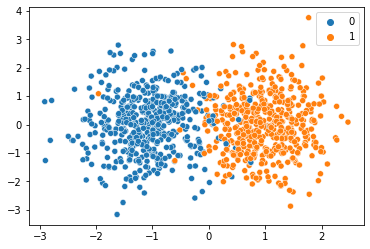

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1))

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

In [3]:
x[:20]

array([[-1.86861197,  0.97277734],
       [ 0.94790441,  1.64545526],
       [-0.89667718,  0.13085479],
       [ 1.07041848, -1.10127033],
       [ 0.64828013, -1.26494759],
       [-1.05829743, -1.70604372],
       [-0.70323384,  0.55461647],
       [-1.13794204,  1.908745  ],
       [-0.56199639,  1.79515398],
       [ 2.24799728, -0.46355951],
       [-0.77801517, -1.4425683 ],
       [ 0.12350293,  0.52567182],
       [ 1.16935351,  0.11064847],
       [-0.6200348 ,  0.15515123],
       [ 1.10869155, -0.33842538],
       [ 0.0599369 ,  0.0093694 ],
       [-1.06748867,  0.03302178],
       [-0.77164691,  1.5879939 ],
       [ 0.48370423, -1.00700756],
       [-0.43549066,  0.6013974 ]])

In [4]:
y[:20]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [5]:
class logistic_regression:
    def sigmoid(self,x): return 1/(1+np.exp(-x))
    def __init__(self,features=2,lambda_=0.1,regulaization="None"):
        self.features=features
        self.weights=np.random.rand(features)
        self.bias=0.
        self.regulaization=regulaization
        self.lambda_=lambda_
    def compute_cost(self,y,y_hat):
        term1=np.sum(np.multiply(y,np.log(1-y_hat)))
        term2=np.sum(np.multiply(1-y,np.log(y_hat)))
        reg=0.
        if(self.regulaization=="L1"):
            reg=self.lambda_*sum(np.abs(self.weights))
        if(self.regulaization=="L2"):
            reg=sum((self.weights**2))*self.lambda_
        return -(term1+term2)/len(y)-reg
    def fit(self,x,y,print_every_nth_epoch=100,learning_rate=0.01,epochs=1000):
        assert x.shape[1]==self.features,"Invalid number of features."
        assert x.shape[0]==y.shape[0],"unequal number of sizes"
        n=x.shape[0]
        for epoch in range(epochs):
            y_hat=np.dot(x,self.weights)+self.bias
            y_hat=self.sigmoid(y_hat)
            diff=y-y_hat
            grad_w=+np.dot(x.T,diff)*learning_rate/n
            if(self.regulaization=="L1"):
                signs=np.where(self.weights>0,1,-1)
                grad_w=grad_w+signs*self.lambda_
            if(self.regulaization=="L2"):
                grad_w=grad_w+self.lambda_*self.weights*2
            self.weights-=grad_w
            grad_b=+np.sum(diff)*learning_rate/n
            self.bias-=grad_b
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------- epoch {} -------> loss={} ----------".format((epoch+1),self.compute_cost(y,y_hat)))
    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred>0.5,1,0)
        diff=np.abs(y-pred)
        return(sum(diff)/len(diff))
    def predict(self,x):
        return self.sigmoid(np.dot(x,self.weights)+self.bias)

In [6]:
def visualize(model,title):
    print("accuracy = {}".format(model.evaluate(x_test,y_test)))
    x1=np.arange(-5,6,0.2)
    x2=np.arange(-5,4,0.2)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred=model.predict([np.array(np.array([x1[i],x2[j]]))])[0]
            if(pred>0.5):
                plt.scatter(x1[i],x2[j],c="c")
            else:
                plt.scatter(x1[i],x2[j],c="b")
    plt.title(title)
    plt.show()

--------- epoch 100 -------> loss=0.7650643317139135 ----------
--------- epoch 200 -------> loss=0.5527450635620833 ----------
--------- epoch 300 -------> loss=0.3911097303601377 ----------
--------- epoch 400 -------> loss=0.2900807967522378 ----------
--------- epoch 500 -------> loss=0.23420021003412528 ----------
--------- epoch 600 -------> loss=0.20630552973639107 ----------
--------- epoch 700 -------> loss=0.19467272126794033 ----------
--------- epoch 800 -------> loss=0.19216648638308328 ----------
--------- epoch 900 -------> loss=0.19477490074646236 ----------
--------- epoch 1000 -------> loss=0.20036786823177635 ----------
accuracy = 0.952


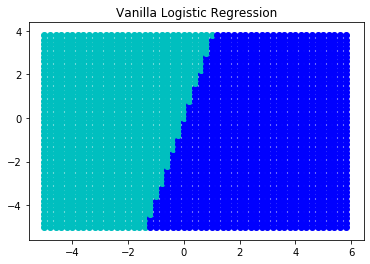

In [7]:
model=logistic_regression(lambda_=0.01)
model.fit(x,y,)
visualize(model,"Vanilla Logistic Regression")

### Ridge Regression
- It penalizes slope decreasing dependency on features
- We add sum(weights^2)*lambda to the loss function
- It trades bias for higher variance

--------- epoch 100 -------> loss=0.5917286790465043 ----------
--------- epoch 200 -------> loss=0.5627254983276653 ----------
--------- epoch 300 -------> loss=0.5577934732938504 ----------
--------- epoch 400 -------> loss=0.55694041375756 ----------
--------- epoch 500 -------> loss=0.5568358860398401 ----------
--------- epoch 600 -------> loss=0.5568950245337055 ----------
--------- epoch 700 -------> loss=0.5570286699066732 ----------
--------- epoch 800 -------> loss=0.5572474991892534 ----------
--------- epoch 900 -------> loss=0.5575967079570808 ----------
--------- epoch 1000 -------> loss=0.5581542228860871 ----------
accuracy = 0.946


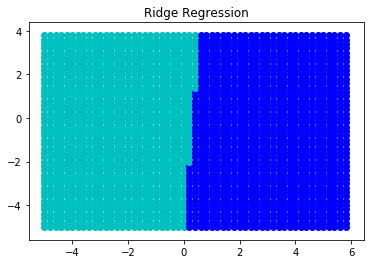

In [8]:
model1=logistic_regression(regulaization="L2",lambda_=0.01)
model1.fit(x,y,)
visualize(model1,"Ridge Regression")

### Lasso Regression
- Same as ridge regression, it penalizes weights
- It adds sum(abs(weights))*lambda to the loss function
- Unlike ridge regression, it can minimize slope to zero thus helping in feature regression

--------- epoch 100 -------> loss=0.9229759173805074 ----------
--------- epoch 200 -------> loss=0.6691208842463885 ----------
--------- epoch 300 -------> loss=0.48895134282552644 ----------
--------- epoch 400 -------> loss=0.3445048631634894 ----------
--------- epoch 500 -------> loss=0.24781952459636394 ----------
--------- epoch 600 -------> loss=0.1913495392836443 ----------
--------- epoch 700 -------> loss=0.16140960514275474 ----------
--------- epoch 800 -------> loss=0.1466730798347192 ----------
--------- epoch 900 -------> loss=0.1403027457112365 ----------
--------- epoch 1000 -------> loss=0.1387162488159614 ----------
accuracy = 0.962


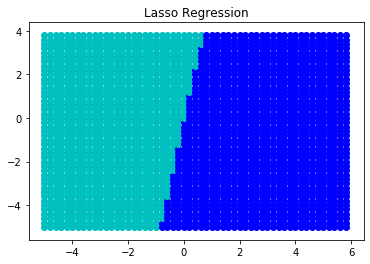

In [9]:
model2=logistic_regression(regulaization="L1",lambda_=0.001)
model2.fit(x,y,)
visualize(model2,"Lasso Regression")